In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


data_train_file  = './train.csv'
train_data = pd.read_csv(data_train_file)
data_test_file  = "./test.csv"
test_data = pd.read_csv(data_test_file)

### CHECKING TRAIN DATA

In [2]:
print(train_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7       00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8       00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9       00040093b2687caa  alignment on this subject and which are contra...   
10      0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11      00054a5e18b50dd4  bbq \n\nbe a man and lets 

In [3]:
print(train_data.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [4]:
print(len(train_data))

159571


### DATA ANALYSIS

In [5]:
lens = train_data.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048919, 5000)

(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

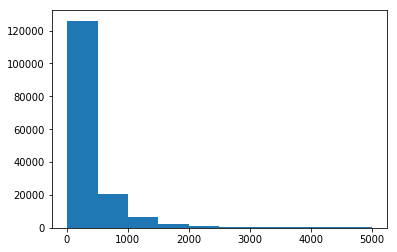

In [6]:
plt.hist(lens)

### Preparing data for training

In [7]:
def remove_punctuation(text):
    import string
    text = text.lower()
    translator =str.maketrans('', '', string.punctuation)
    return (text.translate(translator))


train_data['comment'] = train_data['comment_text'].apply(remove_punctuation)
train_data['comment'] = train_data['comment'].replace('\n','', regex=True)

## Preprocessed Data
print(train_data['comment'])

0         explanationwhy the edits made under my usernam...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3         morei cant make any real suggestions on improv...
4         you sir are my hero any chance you remember wh...
5         congratulations from me as well use the tools ...
6              cocksucker before you piss around on my work
7         your vandalism to the matt shirvington article...
8         sorry if the word nonsense was offensive to yo...
9         alignment on this subject and which are contra...
10        fair use rationale for imagewonjujpgthanks for...
11        bbq be a man and lets discuss itmaybe over the...
12        hey what is it  talk what is it an exclusive g...
13        before you start throwing accusations and warn...
14        oh and the girl above started her arguments wi...
15        juelz santanas agein 2002 juelz santana was 18...
16        bye dont look come or think of

### Preprocess Test data

In [8]:
test_data['comment'] = test_data['comment_text'].apply(remove_punctuation)
test_data['comment'] = test_data['comment'].replace('\n','', regex=True)
print(test_data)


                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
5       0001ea8717f6de06  Thank you for understanding. I think very high...   
6       00024115d4cbde0f  Please do not add nonsense to Wikipedia. Such ...   
7       000247e83dcc1211                   :Dear god this site is horrible.   
8       00025358d4737918  " \n Only a fool can believe in such numbers. ...   
9       00026d1092fe71cc  == Double Redirects == \n\n When fixing double...   
10      0002eadc3b301559  I think its crap that the link to roggenbier i...   
11      0002f87b16116a7f  "::: Somebody will invaria

### FEATURE EXTRACTION AND TRAINING MODEL

In [9]:
# Taking both train data and test data to calculate features at once
data = train_data.append(test_data)
#fetching comment for imput
Comment = data['comment']
Comment = Comment.tolist()
#fetching the output labels for each comment
y_train = train_data.iloc[:,2:8]
y_train = np.array(y_train)



## using scikit learn to calculate count vector for each comment
## Creating the vectorizer
vectorizer = TfidfVectorizer()
vectorizer


## Calculating count vector of dataset and to be used as an input for my model.
X = vectorizer.fit_transform(Comment)
X_train = X[0:len(train_data)]
X_test = X[len(train_data):]



## Creating classifer one vs rest through SVM for training my model
classif = OneVsRestClassifier(SGDClassifier(loss="hinge", penalty="l2"))
classif.fit(X_train, y_train)

c:\users\ridhima\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\ridhima\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          n_jobs=1)

### Predicting on test data

In [10]:
y_predict = classif.predict(X_test)
print(y_predict)

[[1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


### GENERATING FINAL OUTPUT FOR TEST DATA

In [11]:
from collections import OrderedDict
id = test_data['id']
id.tolist()
toxic = y_predict[0:,0]
toxic.tolist()
severe_toxic = y_predict[0:,1]
severe_toxic.tolist()
obscene = y_predict[0:,2]
obscene.tolist()
threat = y_predict[0:,3]
threat.tolist()
insult = y_predict[0:,4]
insult.tolist()
identity_hate = y_predict[0:,5]
identity_hate.tolist()
df = pd.DataFrame( OrderedDict({'id':id,'toxic':toxic,'severe_toxic':severe_toxic,'obscene':obscene,'threat':threat,'insult':insult,'identity_hate':identity_hate}  ) )
print(df)

                      id  toxic  severe_toxic  obscene  threat  insult  \
0       00001cee341fdb12      1             0        1       0       1   
1       0000247867823ef7      0             0        0       0       0   
2       00013b17ad220c46      0             0        0       0       0   
3       00017563c3f7919a      0             0        0       0       0   
4       00017695ad8997eb      0             0        0       0       0   
5       0001ea8717f6de06      0             0        0       0       0   
6       00024115d4cbde0f      0             0        0       0       0   
7       000247e83dcc1211      0             0        0       0       0   
8       00025358d4737918      0             0        0       0       0   
9       00026d1092fe71cc      0             0        0       0       0   
10      0002eadc3b301559      0             0        0       0       0   
11      0002f87b16116a7f      0             0        0       0       0   
12      0003806b11932181      0       

In [12]:
df.to_csv('submissions_tfidf.csv', sep=',',index=False)